## Import data and inspect

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [10]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [11]:
train_df.shape

(8693, 14)

In [12]:
test_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

In [13]:
train_df.head()



,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [14]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [24]:
round(train_df.corr(),2)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.00,0.07,0.13,0.03,0.12,0.10,-0.08
RoomService,0.07,1.00,-0.02,0.05,0.01,-0.02,-0.24
FoodCourt,0.13,-0.02,1.00,-0.01,0.22,0.23,0.05
ShoppingMall,0.03,0.05,-0.01,1.00,0.01,-0.01,0.01
Spa,0.12,0.01,0.22,0.01,1.00,0.15,-0.22
VRDeck,0.10,-0.02,0.23,-0.01,0.15,1.00,-0.21
Transported,-0.08,-0.24,0.05,0.01,-0.22,-0.21,1.00


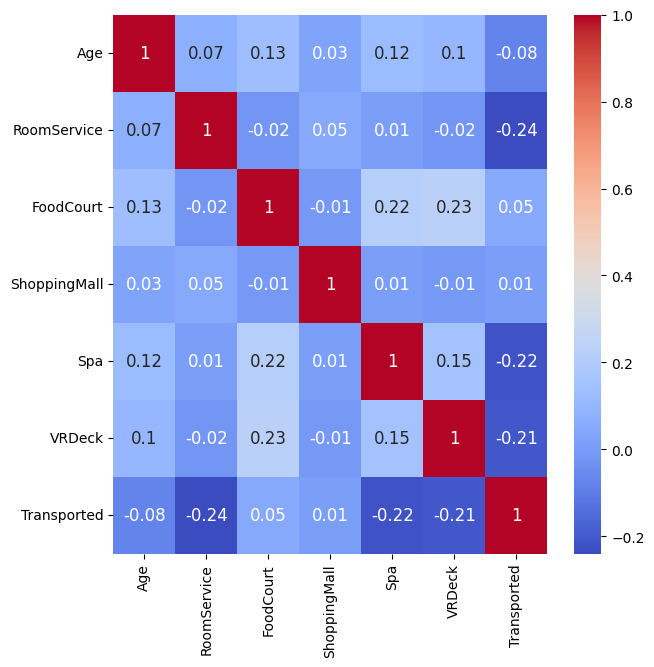

In [25]:
plt.figure(figsize = (7,7))
sns.heatmap(round(train_df.corr(),2), cmap = "coolwarm", annot = True, annot_kws = {"size":12});

## Clean data

In [26]:
train_df[['Cabin', 'Transported']].groupby('Cabin').mean()

,Transported
Cabin,
A/0/P,0.5
A/0/S,0.0
A/1/S,1.0
A/10/P,0.0
A/10/S,1.0
...,...
T/0/P,0.0
T/1/P,0.0
T/2/P,0.0


*Isolate cabin letter*

In [27]:
train_df['Cabin'].str.split(pat="/")

0          [B, 0, P]
1          [F, 0, S]
2          [A, 0, S]
3          [A, 0, S]
4          [F, 1, S]
            ...     
8688      [A, 98, P]
8689    [G, 1499, S]
8690    [G, 1500, S]
8691     [E, 608, S]
8692     [E, 608, S]
Name: Cabin, Length: 8693, dtype: object

In [28]:
train_df["cabin_no"] = train_df["Cabin"].str[0]

In [29]:
train_df["cabin_no"]

0       B
1       F
2       A
3       A
4       F
       ..
8688    A
8689    G
8690    G
8691    E
8692    E
Name: cabin_no, Length: 8693, dtype: object

<AxesSubplot:xlabel='cabin_no'>

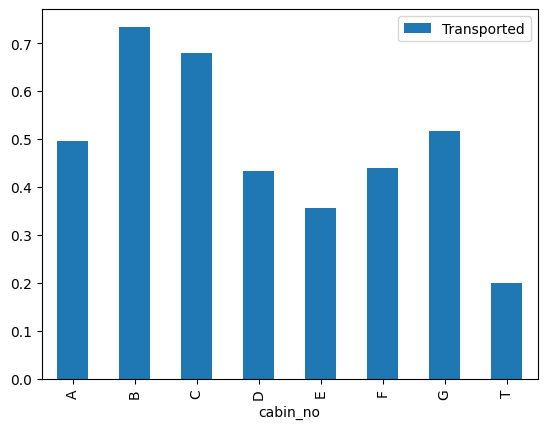

In [30]:
train_df[['cabin_no', 'Transported']].groupby('cabin_no').mean().plot(kind = 'bar')

*Impute null values*

In [31]:
(train_df.isna().sum()/len(train_df)).sort_values(ascending = False)

CryoSleep       0.024963
ShoppingMall    0.023927
VIP             0.023352
HomePlanet      0.023122
Name            0.023007
Cabin           0.022892
cabin_no        0.022892
VRDeck          0.021627
FoodCourt       0.021051
Spa             0.021051
Destination     0.020936
RoomService     0.020821
Age             0.020591
PassengerId     0.000000
Transported     0.000000
dtype: float64

In [32]:
train_df_tobeimputed = train_df.drop(['PassengerId', 'Transported', 'cabin_no'], axis =1)
    

In [33]:
train_df_tobeimputed.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name'],
      dtype='object')

In [34]:
from sklearn.impute import SimpleImputer
for column in train_df_tobeimputed:
    simple_imputer = SimpleImputer(strategy = "most_frequent")
    simple_imputer.fit(train_df_tobeimputed[[column]])
    train_df[[column]] = simple_imputer.transform(train_df_tobeimputed[[column]])
    

In [35]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin_no
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F


In [36]:
(train_df.isna().sum()/len(train_df)).sort_values(ascending = False)

cabin_no        0.022892
PassengerId     0.000000
HomePlanet      0.000000
CryoSleep       0.000000
Cabin           0.000000
Destination     0.000000
Age             0.000000
VIP             0.000000
RoomService     0.000000
FoodCourt       0.000000
ShoppingMall    0.000000
Spa             0.000000
VRDeck          0.000000
Name            0.000000
Transported     0.000000
dtype: float64

## Encoding data and target

In [37]:
X = train_df.drop(columns='Transported')
y = train_df['Transported']

In [38]:
y.head()

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool

In [39]:
y = y.astype(int)

In [40]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Transported, dtype: int64

In [41]:
y.value_counts()

1    4378
0    4315
Name: Transported, dtype: int64

In [42]:
X.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
cabin_no         object
dtype: object

In [43]:
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'cabin_no']

In [44]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop = "if_binary", # Doesn't create an extra column for binary features
                    sparse = False, # Returns full matrixes with zeros where need be instead of sparse matrixes
                    handle_unknown="ignore") # Useful to set everything to zero for unseen categories in the test set

ohe.fit(X[categorical_features])


ohe.categories_

[array(['Earth', 'Europa', 'Mars'], dtype=object),
 array([False, True], dtype=object),
 array(['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e'], dtype=object),
 array([False, True], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', nan], dtype=object)]

In [45]:
ohe.get_feature_names_out()

array(['HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'CryoSleep_True', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_True',
       'cabin_no_A', 'cabin_no_B', 'cabin_no_C', 'cabin_no_D',
       'cabin_no_E', 'cabin_no_F', 'cabin_no_G', 'cabin_no_T',
       'cabin_no_nan'], dtype=object)

In [46]:
X_categorical_encoded = pd.DataFrame(ohe.transform(X[categorical_features]),
                                           columns = ohe.get_feature_names_out(),
                                           index = X.index)

X_categorical_encoded.head()

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,cabin_no_A,cabin_no_B,cabin_no_C,cabin_no_D,cabin_no_E,cabin_no_F,cabin_no_G,cabin_no_T,cabin_no_nan
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [47]:
features_train = pd.concat([X.drop(columns = categorical_features), X_categorical_encoded], 
                           axis = 1)

In [63]:
features_train = features_train.drop(columns = ['PassengerId'])

## Feature Scaling

In [64]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

scaler.fit(features_train)

features_train_scaled = pd.DataFrame(scaler.transform(features_train), 
                                     columns = features_train.columns,
                                     index = features_train.index)



In [65]:
features_train_scaled

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,...,VIP_True,cabin_no_A,cabin_no_B,cabin_no_C,cabin_no_D,cabin_no_E,cabin_no_F,cabin_no_G,cabin_no_T,cabin_no_nan
0,0.705882,0.000000,0.000000,0.000000,0.000000,0.000,-1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.176471,2.658537,0.147541,1.136364,10.358491,1.100,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.823529,1.048780,58.622951,0.000000,126.698113,1.225,-1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.352941,0.000000,21.032787,16.863636,62.811321,4.825,-1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.647059,7.390244,1.147541,6.863636,10.660377,0.050,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.823529,0.000000,111.786885,0.000000,31.000000,1.850,-1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8689,-0.529412,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8690,-0.058824,0.000000,0.000000,85.090909,0.018868,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8691,0.294118,0.000000,17.196721,0.000000,6.660377,80.875,-1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Baseline model

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

model = SVC(kernel='linear')
cross_val_score(model, features_train_scaled, y, cv=5).mean()

0.7783290133411329

In [72]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

######################
# Instanciate model  #
######################

# $DELETE_BEGIN
model = SVC()
# $DELETE_END

#################################
# Hyperparameters' search space #
#################################

# $DELETE_BEGIN
search_space = {
    'kernel': ['rbf'],
    'C': stats.uniform(0.01, 100),
    'gamma': stats.loguniform(0.001, 100)
    #'degree': stats.randint(1, 5),
}
# $DELETE_END

################################
# Instanciate Random Search    #
################################
# $DELETE_BEGIN

random_search = RandomizedSearchCV(model, 
                                   search_space,
                                   n_jobs=-1, 
                                   scoring='accuracy', 
                                   cv=5, 
                                   n_iter=200, 
                                   verbose=1)
# $DELETE_END

In [73]:
random_search.fit(np.array(features_train_scaled), np.array(y))

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


KeyboardInterrupt: 